In [1]:
from ipynb.fs.defs.ch1_preorders import (
    CatObject,
    Arrow,
    Category,
    Preorder
)

class MonoidalPreorder(Preorder):
    
    def __init__(self, points, arrows):
        super(MonoidalPreorder, self).__init__(points, arrows)
        
    def _find_needed_items(self, obj):
        return set([ item.source for item in self.arrows if item.target == obj ])
    
    def can_create(self, inputs, output):
        input_set = set(inputs)
        if not input_set:
            return False
        checked_objects = []
        needed_inputs = self._find_needed_items(output)
        checked_objects.append(output)
        if not needed_inputs:
            return False
        while True:
            if len(needed_inputs) == 0:
                return True
            for item in input_set:
                if item in needed_inputs:
                    needed_inputs.remove(item)
            new_needed_inputs = set()
            for item in needed_inputs:
                if item not in checked_objects:
                    obj_inputs = self._find_needed_items(item)
                    if obj_inputs:
                        for new_item in obj_inputs:
                            new_needed_inputs.add(new_item)
                    else:
                        new_needed_inputs.add(item)
                    checked_objects.append(item)
                else:
                    new_needed_inputs.add(item)
            if new_needed_inputs == needed_inputs and needed_inputs:
                return False
            needed_inputs = new_needed_inputs
        

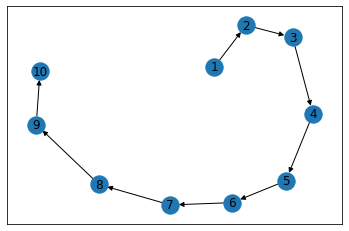

In [2]:
nat_numbers = [ CatObject(i) for i in range(1, 11) ]
nat_arrows = [ Arrow(i, i+1) for i in range(1, 10) ]

nat_preorder = MonoidalPreorder(nat_numbers, nat_arrows)
nat_preorder.draw_graph()

In [3]:
nat_preorder.can_create([5], 8)

True

In [4]:
nat_preorder.can_create([8], 5)

False

In [5]:
nat_preorder.can_create([1,2,3], 4)

True

In [6]:
nat_preorder.can_create([1,8], 4)

True

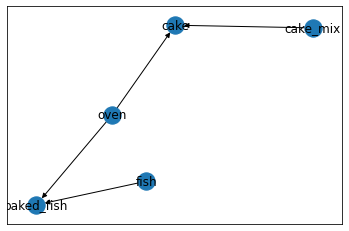

In [7]:
kitchen_items = [ CatObject(item) for item in ['oven', 'cake_mix', 'fish', 'cake', 'baked_fish'] ]
kitchen_arrow_tuples = [
    ('oven', 'cake', 'bake_cake'),
    ('cake_mix', 'cake', 'bake_cake'),
    ('oven', 'baked_fish', 'bake_fish'),
    ('fish', 'baked_fish', 'bake_fish')
]
kitchen_arrows = [ Arrow(item[0], item[1], item[2]) for item in kitchen_arrow_tuples ]
kitchen_preorder = MonoidalPreorder(kitchen_items, kitchen_arrows)
kitchen_preorder.draw_graph()

In [8]:
kitchen_preorder.can_create(["oven", "fish"], "baked_fish")

True

In [9]:
kitchen_preorder.can_create(["oven", "fish"], "cake")

False

In [10]:
kitchen_preorder.can_create(["oven", "fish", "cake_mix"], "cake")

True